In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Prepare dataset
data = np.loadtxt('/content/drive/MyDrive/코드/코드/데이터 사이언스 랩/22-1학기/9강 Ensemble/data.csv', delimiter=',', dtype=float)
labels = data[:, 0]
features = preprocessing.minmax_scale(data[:, 1:])
X_train, X_test, y_train, y_test = train_test_split(features, labels.ravel(), test_size=0.3)

### 의사결정나무
* random_state = 2022 으로 설정
* 변수명은 dt_clf 로 설정

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# 빈 부분 코드 작성
# decision tree
dt_clf = DecisionTreeClassifier(random_state = 2022)

In [ ]:
# 개별 분류기에 train set 피팅
dt_clf.fit(X_train,y_train) 

DecisionTreeClassifier(random_state=2022)

In [ ]:
# test셋으로 prediction
dt_pred = dt_clf.predict(X_test)

In [ ]:
# 성능 확인
# accuracy_score 계산
print(accuracy_score(dt_pred,y_test))

0.8415841584158416


### 랜덤 포레스트
* random_state = 2022
* 변수명 rf_clf 로

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# random forest
rf_clf = RandomForestClassifier(random_state = 2022)

In [ ]:
# 개별 분류기에 train set 피팅
rf_clf.fit(X_train,y_train) 

RandomForestClassifier(random_state=2022)

In [ ]:
# test셋으로 prediction
rf_pred = rf_clf.predict(X_test)

In [ ]:
# 성능 확인
# accuracy_score 계산
print(accuracy_score(rf_pred,y_test))

0.9108910891089109


### Gradient Boost
* random_state = 2022
* 변수명 gb_clf 로

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
# gradient boost
gb_clf = GradientBoostingClassifier(random_state = 2022)

In [ ]:
# 개별 분류기에 train set 피팅
gb_clf.fit(X_train,y_train) 

GradientBoostingClassifier(random_state=2022)

In [ ]:
# test셋으로 prediction
gb_pred = gb_clf.predict(X_test)

In [ ]:
# 성능 확인
# accuracy_score 계산
print(accuracy_score(gb_pred,y_test))

0.9504950495049505


### 보고서 과제
1. voting, bagging, random forest, boosting, adaboost, gradient boost 의 특징 및 장단점을 스스로 정리해보기
2. Boosting의 advanced model 인 XGBoost, LightGBM, CatBoost에 대해 찾아보고 정리해보기
---------------------------------------
### 0. 앙상블 학습

앙상블 학습은 여러개의 분류기(Classifier)를 생성하고 예측을 결합하여 보다 정확한 예측을 도출하는 기법을 말한다.

특징: 
1. 단일 모델의 약점을 여러 모델들을 결합하는 형태로 보완한다. 
2. 서로다른 유형, 계열의 모델들을 섞으면 성능이 더 좋아지기도 한다. 

유형:
1. Voting
2. Baggin
3. Boosting
4. Stacking
---------------------------------------

### 1. voting
: 서로 다른 알고리즘을 가진 분류기가 같은 데이터 셋을 기반으로 학습되고 결합되는 방식.

voting 방식:
1) Hard voting: 다수의 classifier의 class 예측 결과값을 다수결을 통해 최종 결정.

2) Soft voting: 다수의 classifier의 class 예측 결과값간 확률을 평균하여 최종 결정하는 방식, 일반적으로 성능이 더 우수하다.

---------------------------------------

### 2. bagging
: 같은 유형의 알고리즘 유형 모델들의 데이터 샘플링을 다르게 하여 학습시키는 방식.

특징: 
전체 학습 데이터에서 개별 데이터 세트들로 샘플링하고, 대부분 결정 트리 알고리즘을 사용한다. 

샘플링 된 개별 서브세트를 가지고, 같은 결정 트리 (Decision Tree)Classifier를 학습하여, 각각의 class에 대한 확률을 평균내어 최종 예측값을 도출한다. 

* P.S. Voting과 Bagging은 여러개의 분류기가 투표를 통해 최종 예측 결과를 결정하는 방식이라는 점에서 유사하다. 

---------------------------------------
### 2-1. random forest
대표적인 bagging방식의 알고리즘이다. 
---------------------------------------


### 3. boosting
Boodting 알고리즘이란 여러 개의 weak learner를 순차적으로 학습, 예측하면서 잘못 예측한 데이터에 가중치를 부여하여 오류를 개선해 나가며 학습하는 방식이다. 

단점: 
순차적으로 학습하기 때문에 상대적으로 수행시간이 길다는 단점이 있다. 
---------------------------------------

### 3-1. adaboost

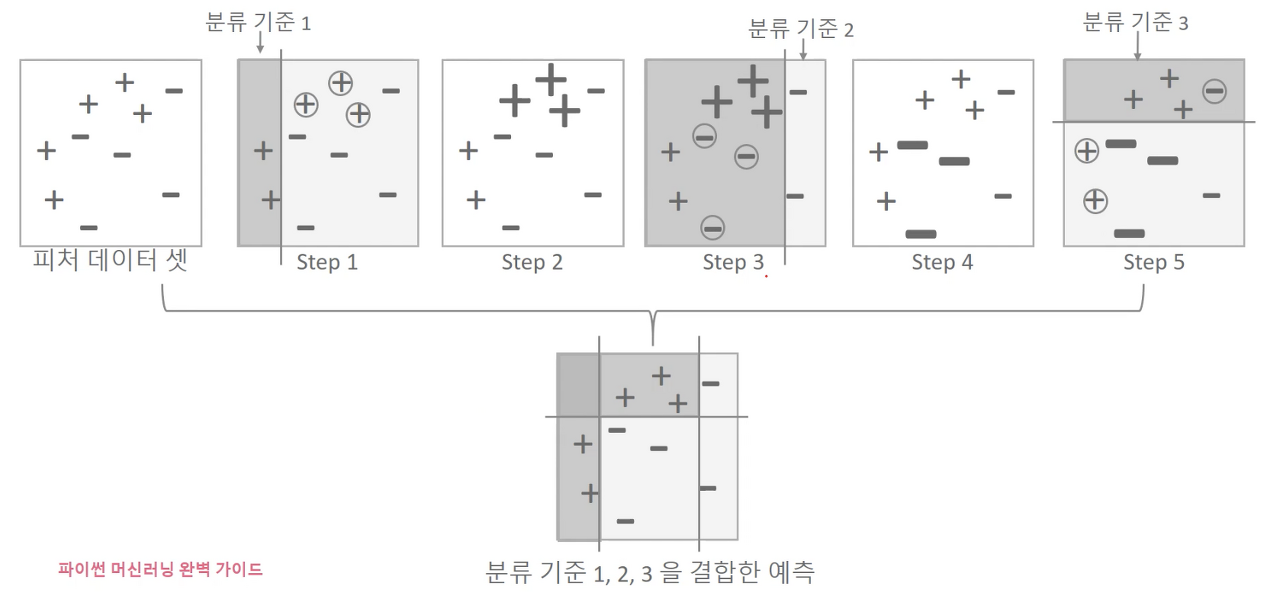


step0. 종속변수가 정해져 있는 분류에 활용할 데이터 셋을 준비한다. 

step1.  분류기준1로 해당 데이터를 나눈다. 

step2. 오류에 해당하는 class 로 분류된 데이터들에 대해 가중치를 부여한다. 

step3. 이 가중치가 반영되어서 분류기준2로 데이터가 나눠진다. 

step4. 다시금 오류에 해당하는 class 로 분류된 데이터들에 대해 가중치를 부여한다. 

step5. 이 가중치가 반영되어서 분류기준3으로 데이터가 나눠진다. 

step6. 최종적으로는 분류기준 1, 2, 3 각각에 가중치를 부여하고 결합하여 분류가 이루어진다. 
---------------------------------------
### 3-2. gradient boost
adaboost와 유사하나 경사하강법(Gradient Descent)을 이용하여 가중치를 업데이트한다는 점이 차이점이다. 

1. loss설정: 경사하강법에서 사용할 비용함수이다. 
2. learning_rate설정: GBM이 학습을 진행할 때마다 적용하는 학습률로, weak learner가 순차적으로 오류값을 보정해 나갈 때 적용하는 계수이다. 
3. n_estimator 설정: 순차적으로 오류를 보정하기 위한 weak_learner의 개수를 설정해야 하는데, 일반적으로 개수가 많을 수록 예측성능이 좋아진다. 그러나 당연히 수행속도도 증가한다. 
---------------------------------------
### 3-3. XGBoost
앞선 GBM의 단점을 보충하는 Boosting 모델이다.


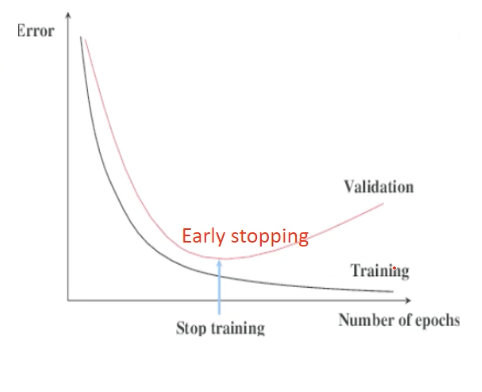

장점: 
1. 분류 뿐만 아니라 회귀에서도 뛰어난 예측 성능을 보인다. 
2. CPU 병렬처리, GPU 지원 등으로 GBM 대비 빠른 수행시간을 가진다. 
3. 정규화 기능, Prunning 기능 등 다양한 성능 향상 기능들을 지원한다. 
4. Early Stopping, 자체 내장된 교차 검증, 결손값 자체 처리와 같은 다양한 편으 기능을 제공한다. 
---------------------------------------
### 3-4. LightGBM
ightGBM의 메인 기술은 GOSS(Gradient-based One-Side Sampling)이다. 
GOSS는 Information gain을 계산할 때, 기울기가 작은(가중치가 작은) 개체에 승수 상수를 적용하여 데이터를 증폭시킨다. 이를 통해 데이터 분포를 많이 변경하지 않아도 훈련이 덜 된 개체에 초점을 보다 잘 맞출 수 있게 된다. 


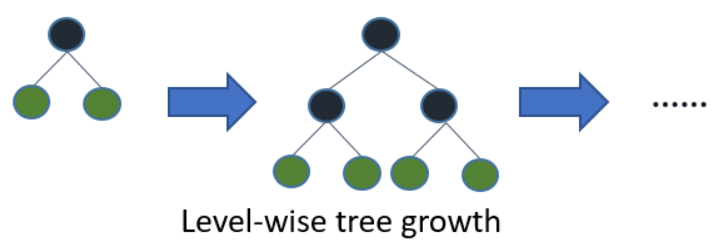

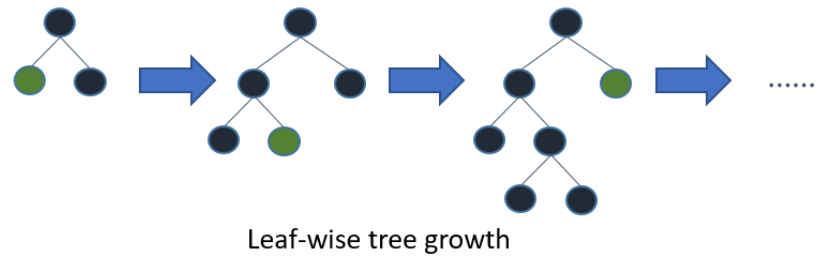


특징: 
1. 일반 GBM 계열 트리가 level-wise(균형 트리 분할) 방식을 채택하는 것에 비해 LightGBM은 leaf-wise(리프 중심 트리 분할)한다. 
2. leaf-wise(리프 중심 트리 분할)은 트리가 깊어지면서 소요되는 시간과 메모리 모두를 절약 할 수 있

장점:  
1. XGBoost에 비해 속도와 성능면에서 모두 좋은 퍼포먼스를 가진다. 특히 속도가 빠르다. 

단점: 
1. 공식문서에서는 적은 데이터에 대한 Overfitting이 일어나기 쉽다고 말하고있다. (대략 10,000개 이하인 경우 적은 것으로 판단.) 
2. 즉, 데이터 셋이 많은 경우에만 사용하는 것이 바람직하다. cost-inefficient 
---------------------------------------
### 3-5. CatBoost
CatBoost는 Categorical Boosting의 약자이다.
즉, Catergorical feature를 처리하는데 중점을 두고있는 알고리즘이다. 

기존 GBM기반 알고리즘들이 가지고 있는 target leakage 문제와 범주형 변수 처리 문제를 ordering principle과 새로운 범주형 변수 처리 방법으로 해결하고자 나왔다.

특징: 
1. 기존 LightGBM은 매번 boosting round에서 범주형 변수를 gradient statistics를 활용해서 변환하여 계산시간과 메모리를 많이 잡아 먹었던 것과는 달리 빠르게 연산할 수 있다. 

장점: 
1. 범주형 변수 처리가 용이하다. 
2. 대부분의 Big Dataset에는 범주형 데이터가 포함되어 있기 때문에 자주 사용될 수 있다. 

단점: 
1. 데이터의 대부분이 수치형인 경우 큰 효과를 보기 어려운 알고리즘이다. 
2. lightgbm에 비해 학습 속도가 느리다.
---------------------------------------
참고: 
1. https://libertegrace.tistory.com/entry/Classification-4-%EC%95%99%EC%83%81%EB%B8%94-%ED%95%99%EC%8A%B5Ensemble-Learning-Boosting3-XGBoost?category=864460

2. https://statinknu.tistory.com/33
---------------------------------------